<a href="https://colab.research.google.com/github/sesitsop/mp/blob/master/ov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="60px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="20px" vspace="5px">

<h1>Welcome to Colaboratory!</h1>
Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. See our [FAQ](https://research.google.com/colaboratory/faq.html) for more info.

## Getting Started
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Loading and saving data: Local files, Drive, Sheets, Google Cloud Storage](/notebooks/io.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Using Google Cloud BigQuery](/notebooks/bigquery.ipynb)
- [Forms](/notebooks/forms.ipynb), [Charts](/notebooks/charts.ipynb), [Markdown](/notebooks/markdown_guide.ipynb), & [Widgets](/notebooks/widgets.ipynb)
- [TensorFlow with GPU](/notebooks/gpu.ipynb)
- [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/): [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb) & [First Steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)


## Roadmap
- investigate ways to take in external data source in json format 


> - historic data sources
> - real time data sources

- investigate ways to process data with python and associated data science modules
- investigate ways to present such data in graphical forms
- investigate ways to predict where the key difference will occur between historic data sources and the real time ones.

## Highlighted Features
### Seedbank

Looking for Colab notebooks to learn from? Check out [Seedbank](https://tools.google.com/seedbank/), a place to discover interactive machine learning examples.

### TensorFlow execution

Colaboratory allows you to execute TensorFlow code in your browser with a single click. The example below adds two matrices.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [0]:
import tensorflow as tf

input1 = tf.ones((2, 3))
input2 = tf.reshape(tf.range(1, 7, dtype=tf.float32), (2, 3))
output = input1 + input2

with tf.Session():
  result = output.eval()
result  

array([[2., 3., 4.],
       [5., 6., 7.]], dtype=float32)

### GitHub

You can save a copy of your Colab notebook to Github by using File > Save a copy to GitHub…

You can load any .ipynb on GitHub by just adding the path to colab.research.google.com/github/ . For example, [colab.research.google.com/github/tensorflow/models/blob/master/samples/core/get_started/_index.ipynb](https://colab.research.google.com/github/tensorflow/models/blob/master/samples/core/get_started/_index.ipynb) will load [this .ipynb](https://github.com/tensorflow/models/blob/master/samples/core/get_started/_index.ipynb) on GitHub.



### Visualization

Colaboratory includes widely used libraries like [matplotlib](https://matplotlib.org/), simplifying visualization.

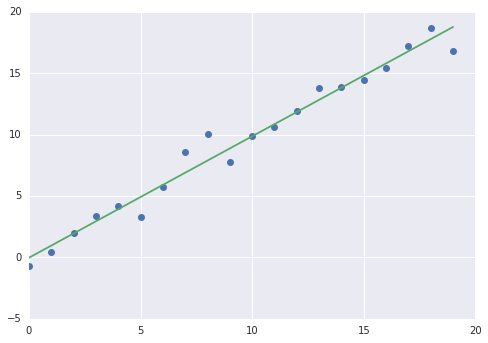

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

Want to use a new library?  `pip install` it at the top of the notebook. Then that library can be used anywhere else in the notebook. For recipes to import commonly used libraries, refer to the [importing libraries example notebook](/notebooks/snippets/importing_libraries.ipynb).

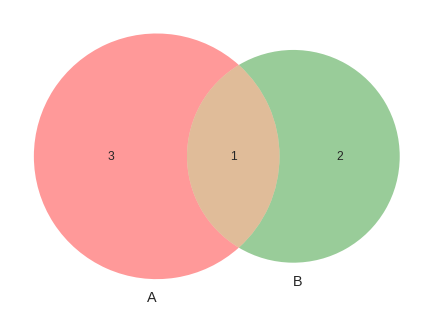

In [0]:
!pip install -q matplotlib-venn

from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

### Forms

Forms can be used to parameterize code. See the [forms example notebook](/notebooks/forms.ipynb) for more details.

In [0]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]


In [0]:
import os
import json
import urllib.request
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

request=urllib.request.Request('http://webtris.highwaysengland.co.uk/api/v1.0/sites')
response = urllib.request.urlopen(request)

sites = response.read()
data = json.loads(sites)
d = json_normalize(data['sites'])

df = pd.DataFrame(data=d)  

# df['desc_split'] = df['Description'].str.split('/')

df['road'], df['geo'] = df['Description'].str.split('/', 1).str

# df.columns

df[(df.road == 'M1') & (df.geo == '2413B')]

# df.head()

# df = df.set_index(['road','geo'])

# df[df.Status == 'Active']

# df.loc[:,['road', 'geo', 'id']]

Trialing the easting and northing - lat lon conversion with python

In [0]:
!pip install --upgrade -q gspread

In [0]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [6]:
# Open our new sheet and read some data.
worksheet = gc.open('OV2016').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
ov = pd.DataFrame.from_records(data=rows)
ov.columns = ov.iloc[0]

ov.reindex(ov.index.drop(0))

# this can load gaz spreadsheets into colab

# create new columm in preparation for displaying lon,lat in this case displaying E,N

# gaz['E_N'] = gaz['Easting']

# gaz.head(3)
  

[['Final closure code description', 'Incident Number', 'Start Date & Time', 'EventLogEntry', 'EventLogDate', 'RCCRegionDescription', 'FirstAssignmentDate', 'IncidentDuration', 'IncidentImpactDuration', 'Easting', 'Northing', 'RoadLinkReference', 'Highway Name', 'RoadLinkDesc', 'LocationDescription', 'Device', 'Link', 'MaintenanceArea', 'final', 'cc2', 'cc3', 'sub1', 'sub2', 'sub3', 'sub4', 'sub5', 'sub6', 'sub7', 'sub8', 'sub9'], ['Oncoming Vehicle', '749', '1/1/16 20:47', 'REPORT - RRB - NO TRACE OF VEH', '1/1/16 20:53', 'South East', '1/1/16 20:51', '1393', 'NULL', '614822', '157957', 'NULL', 'A2', '#N/A', 'CANTERBURY A2 AREA4 KENT ', 'NULL', 'CANTERBURY', 'AREA4', 'OV', '', '', 'Rolling Closure', 'No Trace', '', '', '', '', '', '', ''], ['Oncoming Vehicle', '129', '1/2/16 7:37', 'SIGNAL SETTING - NO TRACE OF VEH - CCTV SHOWS PLANT VEH MOVING IN ROADWORKS ONLY ', '1/2/16 7:45', 'North East', '1/2/16 7:43', '2044', 'NULL', '421579', '505253', 'AL762', 'A1', 'A1 between A1(M) J56 and A

,Final closure code description,Incident Number,Start Date & Time,EventLogEntry,EventLogDate,RCCRegionDescription,FirstAssignmentDate,IncidentDuration,IncidentImpactDuration,Easting,...,cc3,sub1,sub2,sub3,sub4,sub5,sub6,sub7,sub8,sub9
1,Oncoming Vehicle,749,1/1/16 20:47,REPORT - RRB - NO TRACE OF VEH,1/1/16 20:53,South East,1/1/16 20:51,1393,NULL,614822,...,,Rolling Closure,No Trace,,,,,,,
2,Oncoming Vehicle,129,1/2/16 7:37,SIGNAL SETTING - NO TRACE OF VEH - CCTV SHOWS ...,1/2/16 7:45,North East,1/2/16 7:43,2044,NULL,421579,...,,Car,Incident in roadworks,Signal / sign setting,No Trace,,,,,
3,Oncoming Vehicle,725,1/2/16 17:28,SIGNAL SETTING & REPORT - VEH DRIVING C/WISE O...,1/2/16 17:29,South East,1/2/16 17:29,1463,NULL,536015,...,,Signal / sign setting,No Trace,,,,,,,
4,Oncoming Vehicle,963,1/2/16 22:24,SIGNAL SETTING & CCTV - FOREIGN DRIVER/UK VEH ...,1/2/16 22:24,South East,1/2/16 22:24,2049,2035,552699,...,,Car,1 lane closed,,,,,,,
5,Oncoming Vehicle,1091,1/4/16 19:15,SIGNAL SETTING & CCTV - VEH DRIVING N/B ON S/B...,1/4/16 19:16,West Midlands,1/4/16 19:15,1072,NULL,413861,...,,Signal / sign setting,No Trace,,,,,,,
6,Oncoming Vehicle,30,1/5/16 1:31,SIGNAL SETTING - RRB - NO TRACE OF VEH,1/5/16 1:34,South East,1/5/16 1:34,1205,180,552699,...,,Signal / sign setting,Rolling Closure,No Trace,,,,,,
7,Oncoming Vehicle,570,1/5/16 11:58,SIGNAL SETTING - CONGESTION - POSS VEHS REV BA...,1/5/16 11:58,North East,1/5/16 11:58,2763,NULL,438943,...,,Signal / sign setting,,,,,,,,
8,Oncoming Vehicle,1005,1/5/16 17:30,REPORT - ELDERLY DRIVER - VEH LEFT NETWORK - V...,1/5/16 17:31,East Midlands,1/5/16 17:31,197,NULL,472455,...,,Car,,,,,,,,
9,Oncoming Vehicle,894,1/7/16 14:14,SIGNAL SETTING & REPORT - CCTV VEH ON H/S BY E...,1/7/16 14:15,South East,1/7/16 14:15,559,NULL,558295,...,,Signal / sign setting,Car,,,,,,,
10,Oncoming Vehicle,1065,1/7/16 15:45,REPORT - VEH DID U-TURN ON SLIP - LEFT NETWORK,1/7/16 15:47,North East,1/7/16 15:47,326,NULL,420367,...,,Car,Incident in roadworks,,,,,,,


In [0]:
gaz["RecordType"].unique()

array(['RecordType', 'SLIP', 'LINK', 'LINKMP', 'JUNCTION', 'INSERTMP',
       'APTRERT', 'OMSA', 'SGN', '2GCAM', 'SIG', 'ERT', 'PLACE',
       'ROUNDABOUT', 'LINKROADMP', 'LINKROAD', 'CAM', 'JSA', 'SASLIP',
       'ERA', 'LAMPCOL', 'Link'], dtype=object)

In [4]:
!pip install --upgrade -q pyproj

    100% |████████████████████████████████| 10.8MB 3.6MB/s 


In [0]:
import os
import pandas as pd
import pyproj
import re

bng = pyproj.Proj(init='epsg:27700')
wgs84 = pyproj.Proj(init='epsg:4326')

east = 502207
north = 305584

lat, lon = pyproj.transform(bng, wgs84, east, north)

print (lon, lat)
# lon - x, lat - y

# this generates lon lat singularly

52.63838623613457 -0.4910535936550519


In [0]:
# create a dataframe to test the mass pyproj.transform over the entire dataframe
!pip install --upgrade -q pyproj

import os
import pandas as pd
import pyproj
import re

E_N = {'OA': ['MN2122270116000050','MN2122270116000051','MN502000305665','PMS2101200635603','MN1635020708000081'],
       'Easting': [502207,502260,502000,501818,501818], 
       'Northing': [305584,305654,305665,305796,305796]}

df = pd.DataFrame(E_N)

# def function to add 15 metres to Easting and Northing to correct misalign. To be confirm

df['newE'] = df.apply(lambda row: row.Easting + 15, axis=1)
df['newN'] = df.apply(lambda row: row.Northing + 15, axis=1)

# Easting = df['newE'].tolist()
# Easting
# Northing = df['newN'].tolist()

# # def transform function
# def proj_transform(df):
#   bng = pyproj.Proj(init='epsg:27700')
#   wgs84 = pyproj.Proj(init='epsg:4326')
#   lon,lat = pyproj.transform(bng,wgs84,Easting,Northing)

#   df['lon'] = lon
#   df['lat'] = lat

#   return df


# proj_transform(df)

# # Convert DataFrame to CSV
# df.to_csv('sample.csv', index=False)
# print('CSV file created.')

# # download csv
# from google.colab import files
# files.download( "sample.csv" )


AttributeError: ignored

In [0]:
import math
math.sqrt(15*15+20*20)

25.0

Streetmap said it should be this: 52.638386,-0.491054

## E_N Conversion to Lon_Lat for Gazetteer MP (This is the one to use!)

In [7]:
# E_N Conversion to Gazetteer

# pip install gspread for google sheet import, pyproj for pyproj.transform
!pip install --upgrade -q gspread
!pip install --upgrade -q pyproj

# import various library
import os
import pandas as pd
import pyproj
import re

# google sheets auth
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

# Open our new sheet and read some data.
worksheet = gc.open('OV2016').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
ov = pd.DataFrame.from_records(data=rows)
ov.columns = ov.iloc[0]

# drop row 0 where the column headers are, gaz is the new table
ov = ov.drop([0])

# # list recordtype

# gaz.RecordType.unique()

# fix misalign then convert E_N

# gaz['newE'] = gaz.apply(lambda gaz: gaz.Easting + 15, axis=1)
# gaz['newN'] = gaz.apply(lambda row: row.Northing + 15, axis=1)

ov['Easting'] = ov['Easting'].astype(int)
ov['newE'] = ov.apply(lambda row: row.Easting, axis=1) # took away +15
Easting = ov['newE'].tolist()

ov['Northing'] = ov['Northing'].astype(int)
ov['newN'] = ov.apply(lambda row: row.Northing, axis=1) # took away +15
Northing = ov['newN'].tolist()

# def transform function
def proj_transform(ov):
  bng = pyproj.Proj(init='epsg:27700')
  wgs84 = pyproj.Proj(init='epsg:4326')
  lon,lat = pyproj.transform(bng,wgs84,Easting,Northing)

  ov['lon'] = lon
  ov['lat'] = lat

  return ov

proj_transform(ov)

# call aforementioned gaz_df to Convert to CSV
# df.to_csv('sample.csv', index=False)
# print('CSV file created.')

ov.to_csv('ov2016.csv', index=False)
print('CSV file created.')

# download csv
from google.colab import files
files.download( "ov2016.csv" )

[['Final closure code description', 'Incident Number', 'Start Date & Time', 'EventLogEntry', 'EventLogDate', 'RCCRegionDescription', 'FirstAssignmentDate', 'IncidentDuration', 'IncidentImpactDuration', 'Easting', 'Northing', 'RoadLinkReference', 'Highway Name', 'RoadLinkDesc', 'LocationDescription', 'Device', 'Link', 'MaintenanceArea', 'final', 'cc2', 'cc3', 'sub1', 'sub2', 'sub3', 'sub4', 'sub5', 'sub6', 'sub7', 'sub8', 'sub9'], ['Oncoming Vehicle', '749', '1/1/16 20:47', 'REPORT - RRB - NO TRACE OF VEH', '1/1/16 20:53', 'South East', '1/1/16 20:51', '1393', 'NULL', '614822', '157957', 'NULL', 'A2', '#N/A', 'CANTERBURY A2 AREA4 KENT ', 'NULL', 'CANTERBURY', 'AREA4', 'OV', '', '', 'Rolling Closure', 'No Trace', '', '', '', '', '', '', ''], ['Oncoming Vehicle', '129', '1/2/16 7:37', 'SIGNAL SETTING - NO TRACE OF VEH - CCTV SHOWS PLANT VEH MOVING IN ROADWORKS ONLY ', '1/2/16 7:45', 'North East', '1/2/16 7:43', '2044', 'NULL', '421579', '505253', 'AL762', 'A1', 'A1 between A1(M) J56 and A